#### 1) Import all the necessary packages

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
import random
import tensorflow as tf
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers.legacy import Adam

#### 2) Read the data from excel file that has file paths for 20,000 Cracked and 20,000 Un cracked surface images and their labels

In [2]:
# Read the data from excel file that consists of image paths of 20,000 Cracked and 20,000 Uncracked images and their labels 
# Labels {0: Un-Cracked; 1: Cracked}

image_paths=pd.read_excel("image_data.xlsx")
image_paths,labels=np.array(image_paths['path']),np.array(image_paths['label'])
len(image_paths),len(labels)

(40000, 40000)

#### 3) Read each image, convert it to grayscale, resize it to 128 X 128 and finally reshape the images to 128 X 128 X 1 

In [3]:
# Read the image and process it into gray scale, resize the image to 128 x 128
images=[]
for path in image_paths:
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            resize_img = cv2.resize(img, (128, 128))
            resize_img.astype('float32')
            images.append(resize_img)
images = np.array(images).reshape(len(images), 128, 128, 1) /255

images[0].shape

(128, 128, 1)

#### 4) Plotting 10 random images and their labels from the images dataset

10 randomly picked images from the dataset along with their label


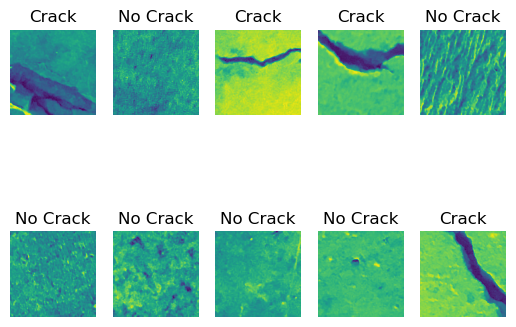

In [4]:
# Method to plot 10 random images from the dataset
def plot_images(images,labels):
    random_list=random.sample(range(len(images)),10)
    for j in range(len(random_list)):
        if labels[random_list[j]]== 0:
            res='No Crack'
        else:
            res='Crack'
        plt.subplot(2, 5, j+1)
        plt.imshow(images[random_list[j]])
        plt.title(res)
        plt.axis('off')  
        
print("10 randomly picked images from the dataset along with their label")
plot_images(images,labels)
    

#### 5) Split the images into Train, Test and Validation datasets. 19500 Train images, 10500 Validation images, 10000 test images

In [5]:
#Split the data into train, test, valid datasets
#Train dataset has 20100 images,labels
#Test dataset has 10000 images and labels
#Validation dataset has 9900 images and labels

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(images,labels,test_size=0.25,shuffle=True)

X_train,X_valid,Y_train,Y_valid=train_test_split(X_train,Y_train,test_size=0.35,shuffle=True)
len(X_train),len(Y_train),len(X_valid),len(Y_valid),len(X_test),len(Y_test)

(19500, 19500, 10500, 10500, 10000, 10000)

#### 6) CNN Sequential model for extracting features and image classification. 

In [6]:
# CNN model for extracting features and image classification
model=keras.models.Sequential()

#Convolution layer
model.add(tf.keras.layers.Conv2D(16, (3,3), padding='same', activation='relu',input_shape=(128,128,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=2))
model.add(tf.keras.layers.Dropout(.3))

#Convolution layer
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',input_shape=(64,64,16)))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=2))
model.add(tf.keras.layers.Dropout(.3))

#Convolution layer
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',input_shape=(32,32,32)))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=2))
model.add(tf.keras.layers.Dropout(.3))

model.add(Flatten())
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(128,activation="softmax"))

#Final Output Layer
model.add(keras.layers.Dense(1,activation="sigmoid"))

#### 7) model summary

In [7]:
# List of layers used and the output shapes after each layer is applied in the CNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0

#### 8) Compile the model with binary_crossentropy and adam optimizer

In [8]:
# Compile the model 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#### 9) Train the model using the 20100 Train images and labels and 9900 Validation images and labels

In [9]:
# Extracting features in Validation dataset and training the model with Training dataset
model_data=model.fit(X_train, Y_train, batch_size = 64, epochs = 5, validation_data=(X_valid,Y_valid))

Epoch 1/5
305/305 [==============================] - 193s 628ms/step - loss: 0.5754 - accuracy: 0.8419 - val_loss: 0.4734 - val_accuracy: 0.9817
Epoch 2/5
305/305 [==============================] - 170s 559ms/step - loss: 0.4117 - accuracy: 0.9867 - val_loss: 0.3844 - val_accuracy: 0.9717
Epoch 3/5
305/305 [==============================] - 173s 567ms/step - loss: 0.3353 - accuracy: 0.9819 - val_loss: 0.4489 - val_accuracy: 0.9790
Epoch 4/5
305/305 [==============================] - 169s 555ms/step - loss: 0.2731 - accuracy: 0.9860 - val_loss: 0.2690 - val_accuracy: 0.9860
Epoch 5/5
305/305 [==============================] - 166s 546ms/step - loss: 0.2285 - accuracy: 0.9864 - val_loss: 0.2235 - val_accuracy: 0.9811


#### 10) Evaluate the model loss and accuracy for the test data

In [10]:
# Testing the model using test data
model.evaluate(X_test,Y_test)

313/313 [==============================] - 17s 55ms/step - loss: 0.2282 - accuracy: 0.9768


[0.22816376388072968, 0.9768000245094299]

#### 11) Predict the labels for the 10000 test images

In [11]:
# Predict the results using the test images dataset 
results= model.predict(X_test)

313/313 [==============================] - 18s 57ms/step


#### 12) Interpret the prediction values

In [12]:
# Method to process the results
# Result value > 0.5 implies cracked and value< 0.5 implies un-cracked

def interpret_results(results):
    predictions=[]
    for i in results:
        if i[0] <= 0.5:
            predictions.append(0)
        elif i[0] > 0.5:
            predictions.append(1)
    return predictions

predictions = interpret_results(results)


#### 13) Displaying 10 of the test images randomly selected and their predicted label

Displaying 10 random test images along with their predictions obtained from the model


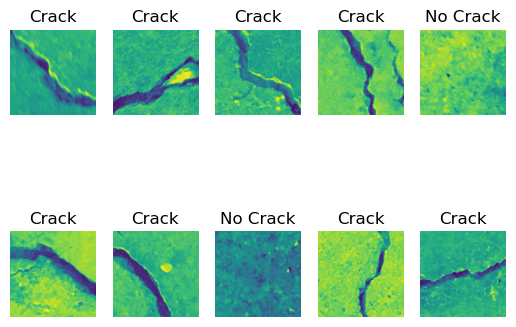

In [13]:
#Display the test images along with their predicted label
print("Displaying 10 random test images along with their predictions obtained from the model")
plot_images(X_test,predictions)

#### 14) Evaluate Accuracy Score, Precision Score, Recall Score and F1 Score for the predictions in comparision to the test image labels for the CNN model

In [14]:
# Metrics to evaluate the test results for the CNN model
test_accuracy = accuracy_score(Y_test, predictions)
test_precision = precision_score(Y_test, predictions)
test_recall = recall_score(Y_test, predictions)
test_f1 = f1_score(Y_test, predictions) 
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1-Score: {test_f1}")

Accuracy: 0.9768
Precision: 0.9585156993339676
Recall: 0.9972282716293803
F1-Score: 0.9774888414515815


##### This CNN model is able to differentiate betwen a surface with cracks and one without any cracks with an accuracy of 98.64 % for Train data and 98.11% for validation data. For the test data this accuracy is found to be about 97.68%. 

#### 15) Change the model to include one of the fully connected layers from the CNN model.

In [15]:
# Using One of the Fully connected layers from the CNN model upto Dense with units 256 

extract_data_features=tf.keras.Model(inputs=model.inputs,outputs=model.layers[-3].output)

In [16]:
# Summary of layers
extract_data_features.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                         

#### 16) Extract features of validation dataset(using one of the fully connected layers of your model).

In [17]:
valid_data_features=extract_data_features.predict(X_valid)

329/329 [==============================] - 26s 77ms/step


#### 17) Create a SVM model with linear kernel and fit the validation features and validation labels

In [18]:
# Creating a SVM model with linear kernel
from sklearn import svm
svm_model=svm.SVC(kernel='linear')

# Fit the model with features of validation set obtained with new fully connected layer and Y_valid labels
svm_model.fit(valid_data_features,Y_valid)

SVC(kernel='linear')

#### 18) Extract the features from the test set using the same fully connected layer and predict the labels using the SVM

In [19]:
#Extract the valid data features using the new fully connected layer
test_data_features=extract_data_features.predict(X_test)

# Predict the results using the SVM model with linear kernel
svm_results=svm_model.predict(test_data_features)

313/313 [==============================] - 20s 62ms/step


#### 19) Plot 10 random images from X_test and their predicted labels from SVM model

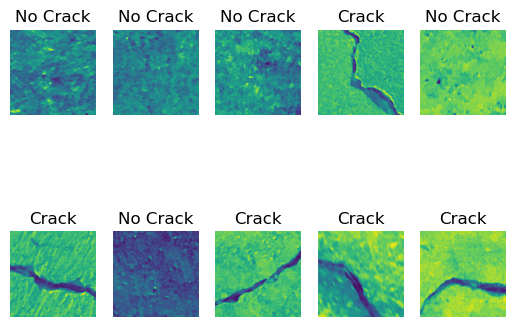

In [20]:
plot_images(X_test,svm_results)

#### 20) Evaluate Accuracy Score, Precision Score, Recall Score and F1 Score for the predictions in comparision to the test image labels for the SVM model

In [21]:
# Metrics to evaluate the test results obtained from SVM
svm_test_accuracy = accuracy_score(Y_test, svm_results)
svm_test_precision = precision_score(Y_test, svm_results)
svm_test_recall = recall_score(Y_test, svm_results)
svm_test_f1 = f1_score(Y_test, svm_results)
print(f"Accuracy: {svm_test_accuracy}")
print(f"Precision: {svm_test_precision}")
print(f"Recall: {svm_test_recall}")
print(f"F1-Score: {svm_test_f1}")

Accuracy: 0.9901
Precision: 0.9908802537668517
Recall: 0.9895070283112255
F1-Score: 0.9901931649331353


#### The Accuracy of the SVM model is about 99.01 %